# Ecommerce Purchases Exercise

    In this notebook Fake Data about some purchases done through Amazon! is used.

    Please excuse anything that doesn't make "Real-World" sense in the dataframe, all the data is made-up. 😎

    The Data is imported from an Ecommerce Purchases csv file and set it to a DataFrame called ecom. **

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from datetime import datetime
import altair as alt
import re

alt.renderers.enable("notebook")

ecom = pd.read_csv('Ecommerce Purchases')

ecom.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


**Check the head of the DataFrame.**

** How many rows and columns are there? **

In [41]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
Address             10000 non-null object
Lot                 10000 non-null object
AM or PM            10000 non-null object
Browser Info        10000 non-null object
Company             10000 non-null object
Credit Card         10000 non-null int64
CC Exp Date         10000 non-null object
CC Security Code    10000 non-null int64
CC Provider         10000 non-null object
Email               10000 non-null object
Job                 10000 non-null object
IP Address          10000 non-null object
Language            10000 non-null object
Purchase Price      10000 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


<div class = "alert alert-success">
    Convert ecom['CC Exp Date'] column to datetime format
</div>

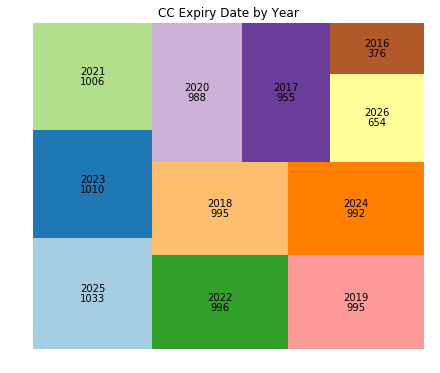

In [47]:
#ecom['CC Exp Date'] = ecom['CC Exp Date'].apply(lambda x: datetime.strptime(x, "%m/%y"))

exp_year = ecom['CC Exp Date'].dt.year

exp_year_count = exp_year.value_counts()

plt.figure(figsize=(7, 6))
cmap = plt.get_cmap("Paired")
color = [cmap(i) for i in np.linspace(0, 1, len(exp_year_count.values))]

ax = squarify.plot(sizes = exp_year_count.values, label= exp_year_count.index, color = color, value = exp_year_count.values)
plt.title("CC Expiry Date by Year")
plt.axis("off")
plt.show()

In [22]:
def limit_percentile(df, group_col=None, metric_col=None, op='count', alpha=0.5):
    frame = ecom.groupby(group_col)[metric_col].agg(op).\
                        sort_values(ascending = False).fillna(value = 0).reset_index()
    #get cummulative sum percentage
    frame['perc'] = frame[metric_col].cumsum() / frame[metric_col].sum()
    
    #filter the values whose cummulative sum percent dont meet the alpha threshold
    frame['new_label'] = frame[[group_col,'perc']].apply(lambda x: x[0] if(x[1] < alpha) else 'others', axis = 1)

    frame = frame.groupby("new_label")[metric_col].sum().\
                        sort_values(ascending = False).reset_index().fillna(value = 0)
    
    frame.rename(columns={metric_col: 'value'}, inplace = True)
    return frame

# limit_percentile(ecom, 'e_dom', 'Job', op = 'count', alpha=0.5)

<div class="alert alert-success">
    ** What is the average Purchase Price? ** 
</div>

In [23]:
ecom['Purchase Price'].mean()

50.34730200000025

<div class="alert alert-success">
    ** What were the highest and lowest purchase prices? **
</div>

In [24]:
ecom['Purchase Price'].max(), ecom['Purchase Price'].min()

(99.99, 0.0)

<div class="alert alert-success">
    ** How many people have English 'en' as their Language of choice on the website? **
</div>

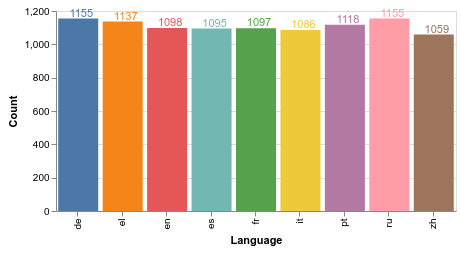

In [25]:
lang = ecom['Language'].value_counts().to_frame().reset_index()

bars = alt.Chart(lang).mark_bar().encode(
    x = alt.X('index', axis = alt.Axis(title='Language') ),
    y = alt.Y('Language', axis = alt.Axis(title='Count') ),
    color = alt.Color('index', legend = None)
)
text = bars.mark_text(
    align = 'center',
    baseline = 'bottom',
    dx = 3
).encode(
    text = 'Language')
(bars + text).properties(width = 400, height = 200)


<div class="alert alert-success">
    ** How many people have the job title of "Lawyer" ? ** 👨🏾‍⚖️
</div>

In [26]:
sum(ecom['Job'] == 'Lawyer')

30

<div class="alert alert-success">
    <p>** How many people made the purchase during the AM ☀️ and how many people made the purchase during PM 🌤? **</p> 

   <p>**(Hint: Check out [value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) ) **</p>
</div>

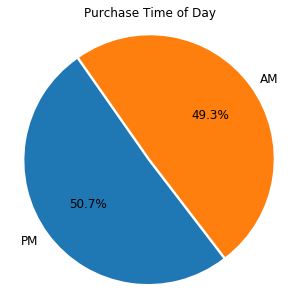

In [27]:
am_pm = ecom['AM or PM'].value_counts()
explode = (0.01, 0.01)

plt.figure(figsize=(5,5))
plt.pie(x = am_pm.values, labels = am_pm.index, autopct = '%.1f%%', explode = explode,
        startangle = 125, textprops = {'color':"black", "fontsize":12})
plt.axis("equal")
plt.title("Purchase Time of Day")
plt.show()

<div class="alert alert-success">
    "What are the browsers being used during purchase?
</div>

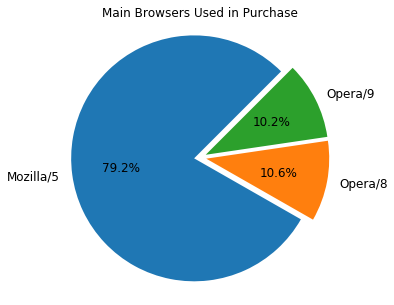

In [28]:
#apply(lambda x: re.search(r"(?P<browser>\w+)(:?\/.*\;)(?P<os>.*)(:?\;)", x).group("browser") )

def get_browser(x):
    try:
        search = re.search(r"(?P<browser>[\w+\/\d+\.]+)(:?[\(|\s].*)", x)
        browser = search.group("browser").strip().rstrip(".")
        return browser
    except AttributeError as e:
        return x
        
ecom['browser'] = ecom['Browser Info'].apply(get_browser)

browsers_main = ecom['browser'].apply(lambda x: 
                                      re.search(r"(?P<pre>.*)(:?\.)", x).group("pre")).value_counts()

explode = [0.05, 0.05, 0.05]
plt.figure(figsize = (5, 5))
plt.pie(x = browsers_main.values, labels = browsers_main.index, autopct= "%.1f%%",
        explode = explode,startangle = 45, textprops={"color":"black", "fontsize":12})
plt.axis("equal")
plt.title("Main Browsers Used in Purchase")
plt.show()

<div class="alert alert-success">
** What are the 10 most common Job Titles? ** 🕵🏿 👩🏿‍⚕️👮🏿 👷🏿‍♀️👨🏿‍✈️ 👩🏿‍🚀
</div>

In [29]:
ecom['Job'].value_counts().head(10)

Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Purchasing manager                   27
Research officer, political party    27
Designer, jewellery                  27
Special educational needs teacher    26
Social worker                        26
Dietitian                            26
Charity fundraiser                   26
Name: Job, dtype: int64

<div class="alert alert-success">
    ** Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction? **
</div>

In [30]:
ecom[ecom['Lot']== "90 WT"]['Purchase Price']

513    75.1
Name: Purchase Price, dtype: float64

<div class="alert alert-success">
    ** What is the email of the person with the following Credit Card Number: 4926535242672853 **  🕵🏾
</div>

In [31]:
ecom[ecom['Credit Card']==4926535242672853]['Email']

1234    bondellen@williams-garza.com
Name: Email, dtype: object

<div class="alert alert-success">
    ** How many people have American Express as their Credit Card Provider *and* made a purchase above $95 ?**
</div>

In [32]:
ecom[(ecom['CC Provider']=="American Express") & (ecom['Purchase Price'] > 95)].count()


Address             39
Lot                 39
AM or PM            39
Browser Info        39
Company             39
Credit Card         39
CC Exp Date         39
CC Security Code    39
CC Provider         39
Email               39
Job                 39
IP Address          39
Language            39
Purchase Price      39
browser             39
dtype: int64

<div class="alert alert-success">
    ** Hard: What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) **
</div>

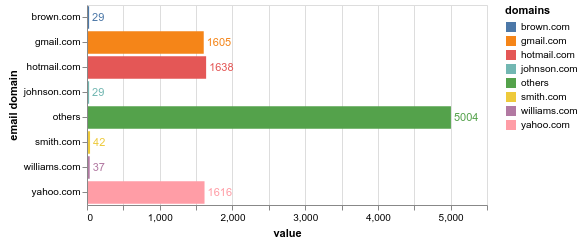

In [33]:
ecom['e_dom'] = ecom['Email'].apply(lambda email: email.split('@')[1])
domains = limit_percentile(ecom, 'e_dom', 'Job', op = 'count', alpha=0.5)
domains

bars = alt.Chart(domains).mark_bar(color = 'orange').encode(
    x = alt.X('value'),
    y = alt.Y('new_label', axis = alt.Axis(title='email domain')),
    order = alt.Order('value', sort = 'ascending'),
    color = alt.Color('new_label', legend = alt.Legend(title = 'domains', orient = 'right'))
    
    )
text = bars.mark_text(
    align = 'left',
    baseline = 'middle',
    dx = 3).encode(
    text = 'value')
(bars + text).properties(width = 400, height = 200)

# Great Job! 👨🏼‍🎤

In [34]:
# from vega_datasets import data

# source = data.cars()

# # Configure common options
# base = alt.Chart(source)
# scale = alt.Scale(paddingInner=0)

# # Configure heatmap
# heatmap = base.mark_rect().encode(
#     alt.X('Cylinders:O', scale=scale),
#     alt.Y('Origin:O', scale=scale),
#     color='count()'
# )
# # Configure text
# text = base.mark_text(baseline='middle').encode(
#     x='Cylinders:O',
#     y='Origin:O',
#     text='count()',
#     color=alt.condition(
#         alt.datum['count_*'] > 100,
#         alt.value('red'),
#         alt.value('white')
#     )
# )
# (heatmap + text)